In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Red Sox players

red_sox_data = master_data.loc[master_data["Franchise"] == "Red Sox"]

#Only showing players that signed with the Red Sox

signed_red_sox_data = red_sox_data.loc[red_sox_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_red_sox_data.groupby("Year")

#Unsigned Red Sox draft picks

unsigned_red_sox_data = red_sox_data.loc[red_sox_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1976    79.1
1989    71.1
2011    64.5
1983    46.1
1994    43.1
2005    41.8
1988    40.3
1968    36.7
1973    31.7
2007    31.4
2006    31.4
2004    30.7
2001    30.4
2003    28.5
1971    27.1
1969    26.1
1982    25.0
2002    24.7
1993    22.2
1991    20.7
1980    19.6
1965    18.2
1998    15.8
1997    14.3
1985    14.1
1984    13.4
1996    11.8
1975    11.6
2000    11.2
1999    10.3
1966    10.2
2015     9.3
1972     9.0
1986     6.9
2008     5.5
1990     4.8
1995     3.0
2012     2.6
1970     2.3
2009     2.3
1981     2.2
1987     1.9
2010     1.2
1967     0.7
1974     0.3
2016     0.2
2019     0.0
1978     0.0
2018     0.0
2017     0.0
2013    -0.2
2014    -0.4
1977    -1.2
1979    -1.4
1992    -1.8
Name: Total_WAR, dtype: float64

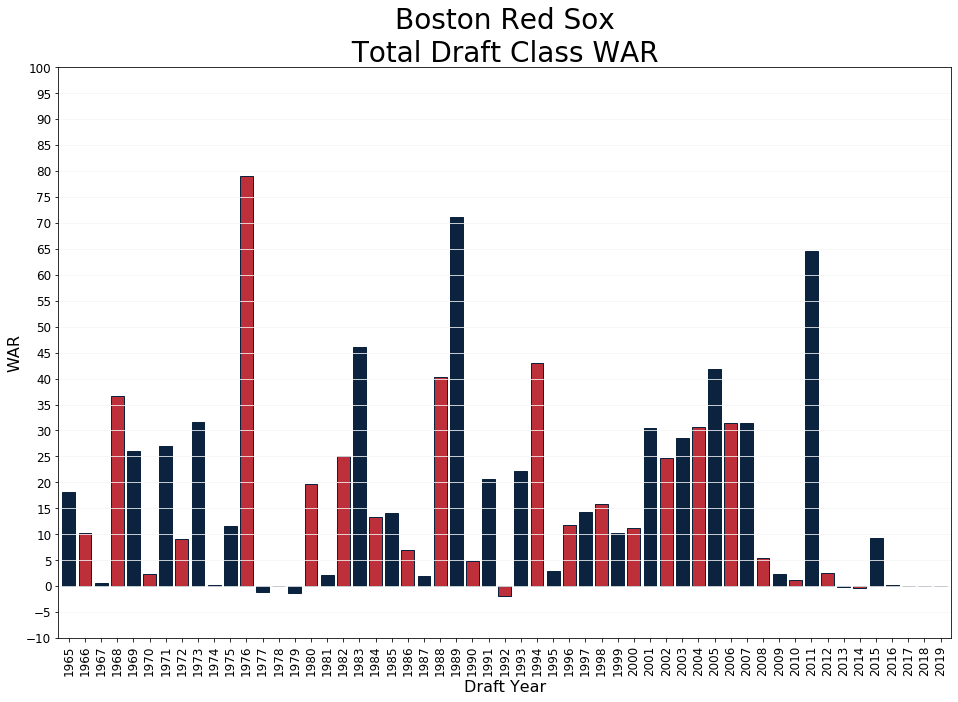

In [13]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#0C2340", "#BD3039"], width = .8, fontsize = 12, edgecolor = "#0C2340", figsize = (16, 10.5))
plt.title("Boston Red Sox\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 101, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Red Sox WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_red_sox_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
9381,1976,7,166,Red Sox,Red Sox,Y,Wade Boggs,1982.0,boggswa01,1001124.0,51.7,0.0,51.7,SS,HS,H. B. Plant HS,Tampa,FL,More than 25 WAR
14887,1983,1,19,Red Sox,Red Sox,Y,Roger Clemens,1984.0,clemero02,815.0,0.0,43.7,43.7,RHP,4Yr,University of Texas at Austin,Austin,TX,More than 25 WAR
21063,1989,4,110,Red Sox,Red Sox,Y,Jeff Bagwell,1991.0,bagweje01,547.0,42.3,0.0,42.3,3B,4Yr,University of Hartford,West Hartford,CT,More than 25 WAR
54871,2011,5,172,Red Sox,Red Sox,Y,Mookie Betts,2014.0,bettsmo01,13611.0,37.2,0.0,37.2,SS,HS,Overton HS,Nashville,TN,More than 25 WAR
28674,1994,1,12,Red Sox,Red Sox,Y,Nomar Garciaparra,1996.0,garcino01,190.0,32.7,0.0,32.7,SS,4Yr,Georgia Institute of Technology,Atlanta,GA,More than 25 WAR
7143,1973,2,41,Red Sox,Red Sox,Y,Fred Lynn,1974.0,lynnfr01,1007872.0,30.7,0.0,30.7,OF,4Yr,University of Southern California,Los Angeles,CA,More than 25 WAR
19641,1988,5,121,Red Sox,Red Sox,Y,John Valentin,1992.0,valenjo02,1375.0,29.9,0.0,29.9,SS,4Yr,Seton Hall University,South Orange,NJ,More than 25 WAR
44260,2004,2,65,Red Sox,Red Sox,Y,Dustin Pedroia,2006.0,pedrodu01,8370.0,29.3,0.0,29.3,SS,4Yr,Arizona State University,Tempe,AZ,More than 25 WAR
5525,1971,1,15,Red Sox,Red Sox,Y,Jim Rice,1974.0,riceji01,1010897.0,26.2,0.0,26.2,OF,HS,T. L. Hanna HS,Anderson,SC,More than 25 WAR
39991,2001,8,243,Red Sox,Red Sox,Y,Kevin Youkilis,2004.0,youklke01,1935.0,25.2,0.0,25.2,3B,4Yr,University of Cincinnati,Cincinnati,OH,More than 25 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_red_sox_data.loc[((signed_red_sox_data["WAR Group"] == "Less than 5 WAR") |
(signed_red_sox_data["WAR Group"] == "No Major League Experience")) & 
(signed_red_sox_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
4,1965,1,5,Red Sox,Red Sox,Y,Billy Conigliaro,1969.0,conigbi01,1002501.0,3.9,0.0,3.9,OF,HS,Swampscott HS,Swampscott,MA,Less than 5 WAR
1657,1967,1,3,Red Sox,Red Sox,Y,Mike Garman,1969.0,garmami01,1004539.0,0.0,0.7,0.7,RHP,HS,Caldwell HS,Caldwell,ID,Less than 5 WAR
2649,1968,1,20,Red Sox,Red Sox,Y,Tom Maggard,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,John H. Glenn HS,Norwalk,CA,No Major League Experience
3554,1969,1,13,Red Sox,Red Sox,Y,Noel Jenke,NaN,NaN,NaN,NaN,NaN,NaN,OF,4Yr,University of Minnesota,Minneapolis,MN,No Major League Experience
6327,1972,1,16,Red Sox,Red Sox,Y,Joel Bishop,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,McClatchy HS,Sacramento,CA,No Major League Experience
7119,1973,1,17,Red Sox,Red Sox,Y,Ted Cox,1977.0,coxte02,1002708.0,-2.1,0.0,-2.1,SS,HS,Midwest City HS,Midwest City,OK,Less than 5 WAR
7869,1974,1,20,Red Sox,Red Sox,Y,Eddie Ford,NaN,NaN,NaN,NaN,NaN,NaN,SS,4Yr,University of South Carolina,Columbia,SC,No Major League Experience
8551,1975,1,15,Red Sox,Red Sox,Y,Otis Foster,NaN,NaN,NaN,NaN,NaN,NaN,1B,4Yr,High Point University,High Point,NC,No Major League Experience
9941,1977,1,13,Red Sox,Red Sox,Y,Andrew Madden,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,New Hartford HS,New Hartford,NY,No Major League Experience
13203,1981,1,19,Red Sox,Red Sox,Y,Steve Lyons,1985.0,lyonsst01,1007886.0,1.9,0.0,1.9,SS,4Yr,Oregon State University,Corvallis,OR,Less than 5 WAR


In [9]:
#Best unsigned draft picks in franchise history

unsigned_red_sox_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
35642,1998,9,265,Red Sox,Red Sox,N,Mark Teixeira,2003.0,teixema01,1281.0,31.8,0.0,31.8,3B,HS,Mount St. Joseph's HS,Baltimore,MD,More than 25 WAR
49530,2007,27,834,Red Sox,Red Sox,N,Yasmani Grandal,2012.0,grandya01,11368.0,27.4,0.0,27.4,C,HS,Miami Springs HS,Miami Springs,FL,More than 25 WAR
57130,2012,29,901,Red Sox,Red Sox,N,Alex Bregman,2016.0,bregmal01,17678.0,20.5,0.0,20.5,2B,HS,Albuquerque Academy,Albuquerque,NM,20-25 WAR
16205,1984,20,510,Red Sox,Red Sox,N,Jack McDowell,1987.0,mcdowja01,1008473.0,0.0,20.2,20.2,RHP,HS,Notre Dame HS,Sherman Oaks,CA,20-25 WAR
32693,1996,22,661,Red Sox,Red Sox,N,Aaron Harang,2002.0,haranaa01,1451.0,-2.8,21.1,18.3,RHP,HS,Patrick Henry HS,San Diego,CA,15-20 WAR
47537,2006,11,343,Red Sox,Red Sox,N,Brandon Belt,2011.0,beltbr01,10264.0,17.5,0.0,17.5,OF,HS,Hudson HS,Lufkin,TX,15-20 WAR
46311,2005,20,618,Red Sox,Red Sox,N,Charlie Blackmon,2011.0,blackch02,7859.0,16.2,0.0,16.2,LHP,JC,Young Harris College,Young Harris,GA,15-20 WAR
12661,1980,12,309,Red Sox,Red Sox,N,Dave Magadan,1986.0,magadda01,1007961.0,15.8,0.0,15.8,3B,HS,Jesuit HS,Tampa,FL,15-20 WAR
51341,2008,39,1192,Red Sox,Red Sox,N,Yan Gomes,2012.0,gomesya01,9627.0,13.4,0.0,13.4,C,4Yr,University of Tennessee,Knoxville,TN,10-15 WAR
31562,1995,43,1194,Red Sox,Red Sox,N,Pat Burrell,2000.0,burrepa01,949.0,12.9,0.0,12.9,3B,HS,Bellarmine College Preparatory,San Jose,CA,10-15 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_red_sox_data.loc[signed_red_sox_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
34351,1997,19,581,Red Sox,Red Sox,Y,David Eckstein,2001.0,eckstda01,10.0,14.5,0.0,14.5,2B,4Yr,University of Florida,Gainesville,FL,10-15 WAR
3135,1968,22,507,Red Sox,Red Sox,Y,Bill Lee,1969.0,leebi03,1007448.0,-0.1,14.1,14.0,LHP,4Yr,University of Southern California,Los Angeles,CA,10-15 WAR
29017,1994,13,355,Red Sox,Red Sox,Y,Carl Pavano,1998.0,pavanca01,790.0,-0.2,13.9,13.7,RHP,HS,Southington HS,Southington,CT,10-15 WAR
47717,2006,17,523,Red Sox,Red Sox,Y,Josh Reddick,2009.0,reddijo01,3892.0,12.7,0.0,12.7,OF,JC,Middle Georgia College,Cochran,GA,10-15 WAR
12765,1980,16,413,Red Sox,Red Sox,Y,Oil Can Boyd,1982.0,boydoi01,1001279.0,0.0,11.8,11.8,RHP,4Yr,Jackson State University,Jackson,MS,10-15 WAR
38628,2000,11,332,Red Sox,Red Sox,Y,Freddy Sanchez,2002.0,sanchfr01,1624.0,10.5,0.0,10.5,SS,4Yr,Oklahoma City University,Oklahoma City,OK,10-15 WAR
9074,1975,23,538,Red Sox,Red Sox,Y,Mike Paxton,1977.0,paxtomi01,1010091.0,0.0,6.3,6.3,RHP,4Yr,University of Memphis,Memphis,TN,5-10 WAR
37201,1999,12,379,Red Sox,Red Sox,Y,Lew Ford,2003.0,fordle01,1724.0,5.8,0.0,5.8,OF,4Yr,Dallas Baptist University,Dallas,TX,5-10 WAR
49050,2007,11,354,Red Sox,Red Sox,Y,Ryan Pressly,2013.0,pressry01,7005.0,0.0,5.2,5.2,RHP,HS,Marcus HS,Flower Mound,TX,5-10 WAR
2876,1968,11,248,Red Sox,Red Sox,Y,Ben Oglivie,1971.0,oglivbe01,1009746.0,5.0,0.0,5.0,INF,HS,Roosevelt HS,Bronx,NY,5-10 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(red_sox_data["Year"], red_sox_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,20.0,75.0,5.0
1966,38.5,57.7,3.8
1967,5.3,89.5,5.3
1968,16.7,75.0,8.3
1969,20.8,75.0,4.2
1970,32.3,61.3,6.5
1971,32.1,64.3,3.6
1972,27.3,54.5,18.2
1973,45.5,54.5,0.0


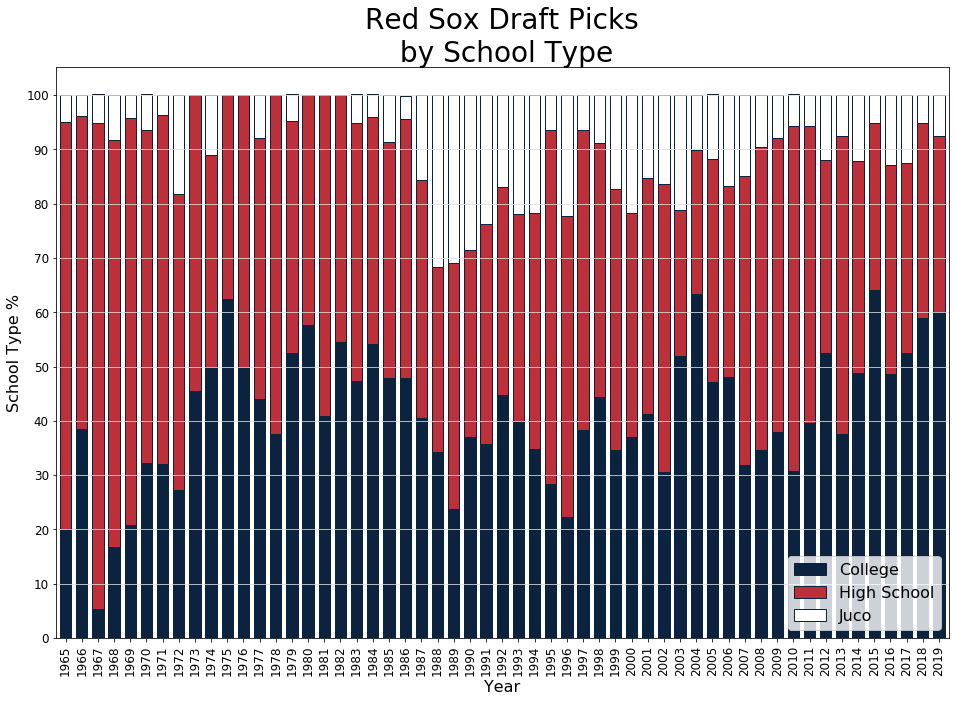

In [12]:
#Bar chart of table above

colors = ["#0C2340", "#BD3039", "white"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#0C2340", stacked = True, figsize = (16, 10.5))
plt.title("Red Sox Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Red Sox Draft Picks by School Type.png")
plt.show()